# Monty Hall

## Introducción

El problema fue originalmente planteado y resuelto en una carta a la revista **American Statistician** en 1975.

Se hizo famoso cuando se hizo la pregunta en la revista **Parade** en una sección que Marilyn vos Savant tenía (**Ask Marilyn**) en 1990

**Marilyn Vos Savant** es conocida por figurar en el libro **Guinnes** de los records como una de las persona con mayor IQ el mundo

El nombre **Monty Hall** surge del presentador de un programa de TV norteamericano llamado **Let’s make a deal (1963)**

## El problema

El concursante debe elegir una puerta entre tres (todas cerradas); el premio consiste en llevarse lo que se encuentra detrás de la elegida. Se sabe con certeza que tras una de ellas se oculta un automóvil, y tras las otras dos hay cabras. Una vez que el concursante haya elegido una puerta y comunicado su elección a los presentes, el presentador, que sabe lo que hay detrás de cada puerta, abrirá una de las otras dos en la que haya una cabra. A continuación, le da la opción al concursante de cambiar, si lo desea, de puerta (tiene dos opciones). ¿Debe el concursante mantener su elección original o escoger la otra puerta? ¿Hay alguna diferencia?

[Referencia](https://es.wikipedia.org/wiki/Problema_de_Monty_Hall)

## Resolución

Definimos aleatoriamente en que puerta se encontrará el auto.

Se define cada ensayo como una V.A de Bernoulli correspondiente, donde se define:

$P(X= Auto) = P(X=1)$

$P(X= Cabra) = P(X=0)$

***NOTA: Se podra variar la cantidad de puertas para hacer más evidente el resultado***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def selection(N, d=3):
    """ Crea una lista de N ensayos con d valores"""
    car = np.random.randint(0, d, N)
    doors = np.zeros([N, d])
    for i in range(N):
        doors[i, car[i]] = 1
    return doors

In [3]:
def monty_hall(iterations_count=1000, doors_count=3):
    # initialization
    hits_change = []
    hits_not_change = []
    hits_rand_change = []

    tests = selection(iterations_count, doors_count) # tests
    contestant = selection(iterations_count, doors_count) # contestant

    # hits counters
    hits_change_count = 0
    hits_not_change_count = 0
    hits_rand_change_count = 0

    for i in range(iterations_count):    
        door_nums = np.arange(doors_count)
        car = np.argmax(tests[i])
        contestant_choice = np.argmax(contestant[i])
        door_nums = np.delete(door_nums, contestant_choice)
        # here a goat door is removed
        # if n doors, n-2 doors are removed
        goats_doors = np.where(tests[i, door_nums]==0)[0]
        if door_nums.size == goats_doors.size:
            door_nums = np.delete(door_nums, goats_doors[:door_nums.size-1])
        else:
            door_nums = np.delete(door_nums, goats_doors[:door_nums.size])

        # contestant choice if change
        contestant_choice_changed = door_nums[0]
        
        # contestant choice if change randomly
        rand_choice = random.choice([contestant_choice, contestant_choice_changed])
            
        if contestant_choice == car:
            hits_not_change_count += 1
        if contestant_choice_changed == car:
            hits_change_count += 1
        if rand_choice == car:
            hits_rand_change_count +=1
            
        hits_change.append(hits_change_count)
        hits_not_change.append(hits_not_change_count)
        hits_rand_change.append(hits_rand_change_count)
    
    return hits_change, hits_not_change, hits_rand_change

### 1000 ensayos con 3 puertas

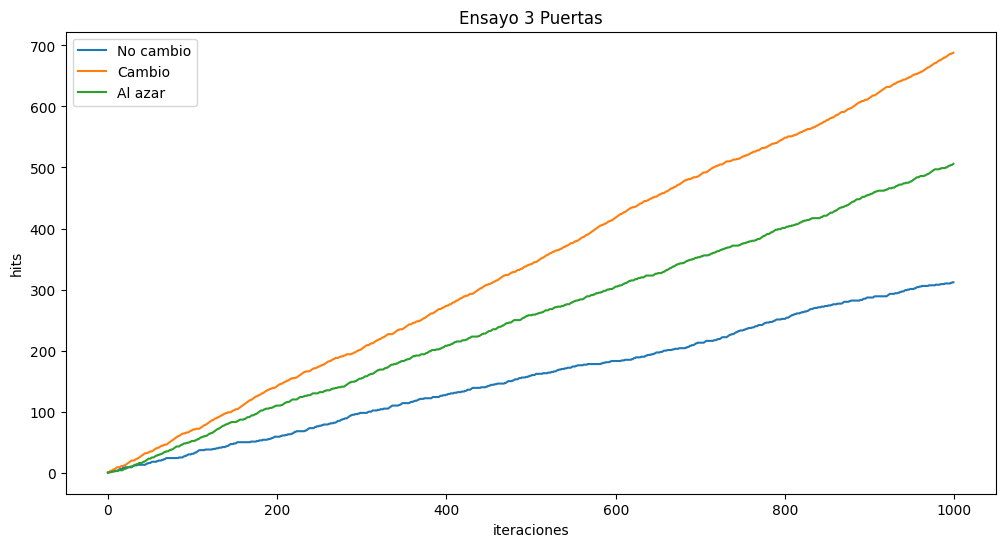

In [4]:
iterations_count = 1000
doors_count = 3
hits_change, hits_not_change, hits_rand_change = monty_hall(iterations_count, doors_count)
iterations = np.arange(iterations_count)
plt.figure(figsize=(12,6))
plt.plot(iterations, hits_not_change, label='No cambio')
plt.plot(iterations, hits_change, label='Cambio')
plt.plot(iterations, hits_rand_change, label='Al azar')
plt.legend(loc="upper left")
plt.xlabel("iteraciones")
plt.ylabel("hits")
plt.title(f"Ensayo {doors_count} Puertas")
plt.show()


Como se puede observar en la figura anterior, el concursante con mas aciertos fue aquel que cambio su decision luego de que quiten una puerta.

Y se puede ver numericamente, calculando la probabilidad como:

$\huge p = \frac{N_p}{N}$

$N_p$ = Numero de resultados favorables

$N$ = Numero de ensayos

In [5]:
p_not_change = hits_not_change[-1]/iterations_count
p_change = hits_change[-1]/iterations_count
p_rand_change = hits_rand_change[-1]/iterations_count
print("Probabilidad de acertierto:")
print(f"\t- al NO CAMBIAR:\t{p_not_change} ---> {p_not_change*100:.2f}%")
print(f"\t- CAMBIANDO:\t\t{p_change} ---> {p_change*100:.2f}%")
print(f"\t- al AZAR:\t\t{p_rand_change} ---> {p_rand_change*100:.2f}%")

Probabilidad de acertierto:
	- al NO CAMBIAR:	0.312 ---> 31.20%
	- CAMBIANDO:		0.688 ---> 68.80%
	- al AZAR:		0.506 ---> 50.60%


### 1000 ensayos con 100 puertas

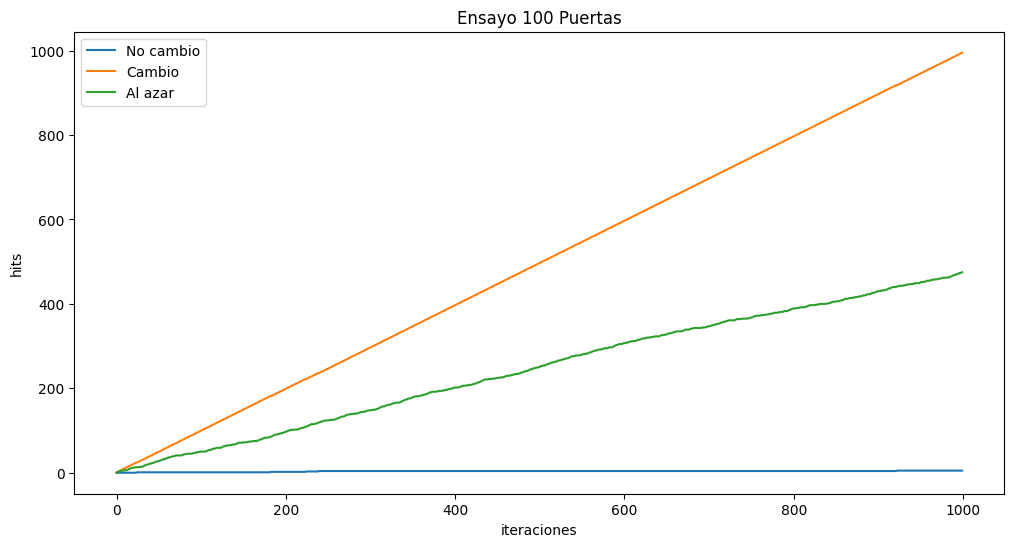

Probabilidad de acertierto:
	- al NO CAMBIAR:	0.005 ---> 0.50%
	- CAMBIANDO:		0.995 ---> 99.50%
	- al AZAR:		0.475 ---> 47.50%


In [6]:
iterations_count = 1000
doors_count = 100
hits_change, hits_not_change, hits_rand_change = monty_hall(iterations_count, doors_count)
iterations = np.arange(iterations_count)
plt.figure(figsize=(12,6))
plt.plot(iterations, hits_not_change, label='No cambio')
plt.plot(iterations, hits_change, label='Cambio')
plt.plot(iterations, hits_rand_change, label='Al azar')
plt.legend(loc="upper left")
plt.xlabel("iteraciones")
plt.ylabel("hits")
plt.title(f"Ensayo {doors_count} Puertas")
plt.show()

p_not_change = hits_not_change[-1]/iterations_count
p_change = hits_change[-1]/iterations_count
p_rand_change = hits_rand_change[-1]/iterations_count
print("Probabilidad de acertierto:")
print(f"\t- al NO CAMBIAR:\t{p_not_change} ---> {p_not_change*100:.2f}%")
print(f"\t- CAMBIANDO:\t\t{p_change} ---> {p_change*100:.2f}%")
print(f"\t- al AZAR:\t\t{p_rand_change} ---> {p_rand_change*100:.2f}%")

## Conclusion

Se realizó una simulación del problema de Monty Hall. A traves de los N ensayos se puede determinar que es **más probable** ganar el concurso si una vez que abren las puertas que contienen las cabras, la decisión es la de **cambiar**. Se pudo observar los resultados de forma numérica y gráfica.